<a href="https://colab.research.google.com/github/assignarc/AI-ML-Work/blob/main/P1_FoodHub_VK_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1
#Could not get it above to work, getting error: AttributeError: module 'pkgutil' has no attribute 'ImpImporter'. Did you mean: 'zipimporter'?

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [10]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# Uncomment and run the below code snippets if the dataset is present in the Google Drive
import sys

if 'google.colab' in sys.modules:
	from google.colab import drive
	drive.mount('/content/drive')
	# Set the path for data
	data_location = '/content/drive/MyDrive/Colab Notebooks/P1-FoodHub/foodhub_order.csv'
else:
	# Set your local path here if not running in Colab
	data_location = 'P1_FoodHub_VK_Notebook_Full_Code.csv'

In [4]:
# Write your code here to read the data
foodhub = pd.read_csv(data_location)

In [5]:
# Write your code here to view the first 5 rows
print('First 5 rows of data')
foodhub.head()


First 5 rows of data


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
# checking shape of the data
print("There are", foodhub.shape[0], 'rows and', foodhub.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:
1. There are 1898 rows and 9 columns in the data provided.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

In the data provided, with 9 columns per row.
1.   Integer fields - 4
2.   Float - 1
3.   Objects -3
4.   Ratings column - Should have been numeric, 'Not given' may be the cause of it.
5. day_of_the_week - This can be converted into nueric to get analysis done differently.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
print('Missing values in the data:')
display(foodhub.isnull().sum())
print("-" *50)

print('Check isna: ')
print(foodhub.isna().sum())
print("-" *50)

display(foodhub.describe().T)
# Check Uniques to make sure
# print(foodhub['rating'].unique())
# print(foodhub['day_of_the_week'].unique())
# print(foodhub['cuisine_type'].unique())
# print(foodhub['restaurant_name'].unique())


Missing values in the data:


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


--------------------------------------------------
Check isna: 
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
stat = foodhub.describe().T
display(stat)
print("-" *50)
print("Food prep time (Minutes)")
print("Minimum", stat.loc['food_preparation_time']['min'].item(), 'Average', stat.loc['food_preparation_time']['mean'].round(2).item(), 'Maximum', stat.loc['food_preparation_time']['max'].item())


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


--------------------------------------------------
Food prep time (Minutes)
Minimum 20.0 Average 27.37 Maximum 35.0


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
display(foodhub['rating'].value_counts())
print('Orders not rated:', foodhub[foodhub['rating'] == 'Not given'].shape[0])

,count
rating,
Not given,736
5,588
4,386
3,188


Orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Unique checks (All columns)

In [11]:

# Iterate over all columns to get unique values
print('-'*50)
print('Unique values in each column:')
print('-'*50)
for column in foodhub:
  print(column, foodhub[column].nunique())
print('*'*50)
print('Some customers have rated restaurants more than once')
cust_group = foodhub.groupby('customer_id')
display(cust_group['restaurant_name'].value_counts().sort_values(ascending=False))

--------------------------------------------------
Unique values in each column:
--------------------------------------------------
order_id 1898
customer_id 1200
restaurant_name 178
cuisine_type 14
cost_of_the_order 312
day_of_the_week 2
rating 4
food_preparation_time 16
delivery_time 19
**************************************************
Some customers have rated restaurants more than once


,,count
customer_id,restaurant_name,
97991,Blue Ribbon Sushi Bar & Grill,6
47440,Bareburger,6
97806,Shake Shack,5
84087,The Meatball Shop,5
47440,Blue Ribbon Fried Chicken,4
...,...,...
398489,Five Guys Burgers and Fries,1
398930,RedFarm Broadway,1
14869,Tres Carnes,1


In [12]:
# #Check Uniques - Old Code, instead iterate over
# print('Unique Orders', foodhub['order_id'].nunique(), sep=' ')
# #Customer ids for uniques
# print('Unique Customers', foodhub['customer_id'].nunique(), sep=' ')
# #restaurant_name for uniques
# print('Unique restaurant_name', foodhub['restaurant_name'].nunique(), sep=' ')
# #cuisine_type for uniques
# print('Unique cuisine_type', foodhub['cuisine_type'].nunique(), sep=' ')
# #ratings for uniques
# print('Unique Ratings', foodhub['rating'].nunique(), sep=' ')

Observation:
* Only 1200 customers with 1898 orders
* 736 orders are not rated, 1162 are rated, but 1200 unique customers
* Some customers have ordered multiple times from one restaurant.

### Cuisine Type

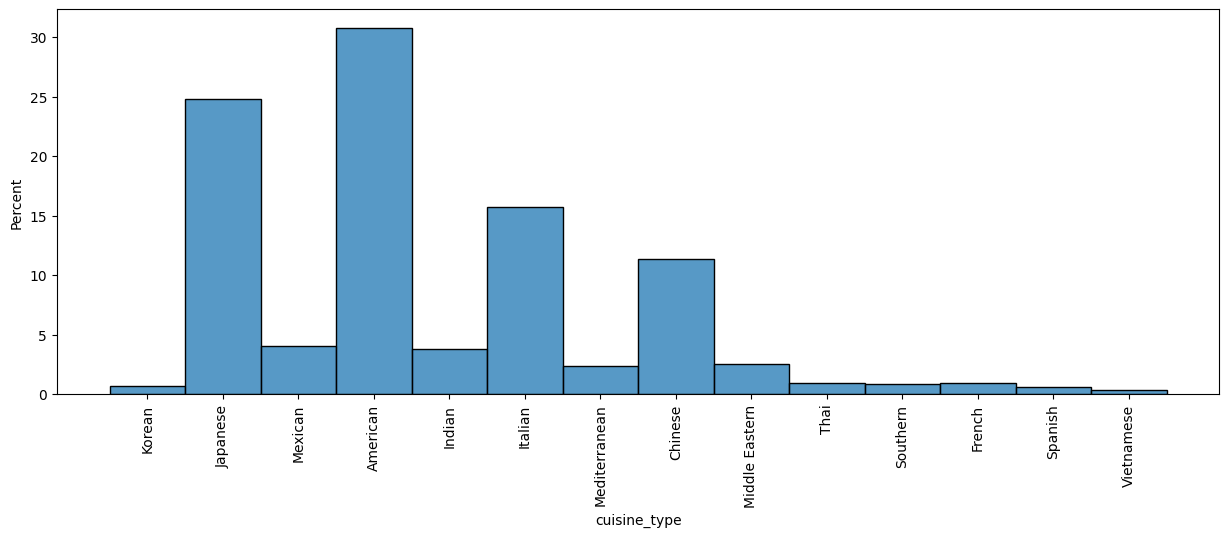

In [13]:
# Check for custine type frequency
plt.figure(figsize = (15,5))
ax = sns.histplot(data=foodhub,x='cuisine_type',stat='percent')
plt.xticks(rotation=90)
plt.show();


### Restaurant Name

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


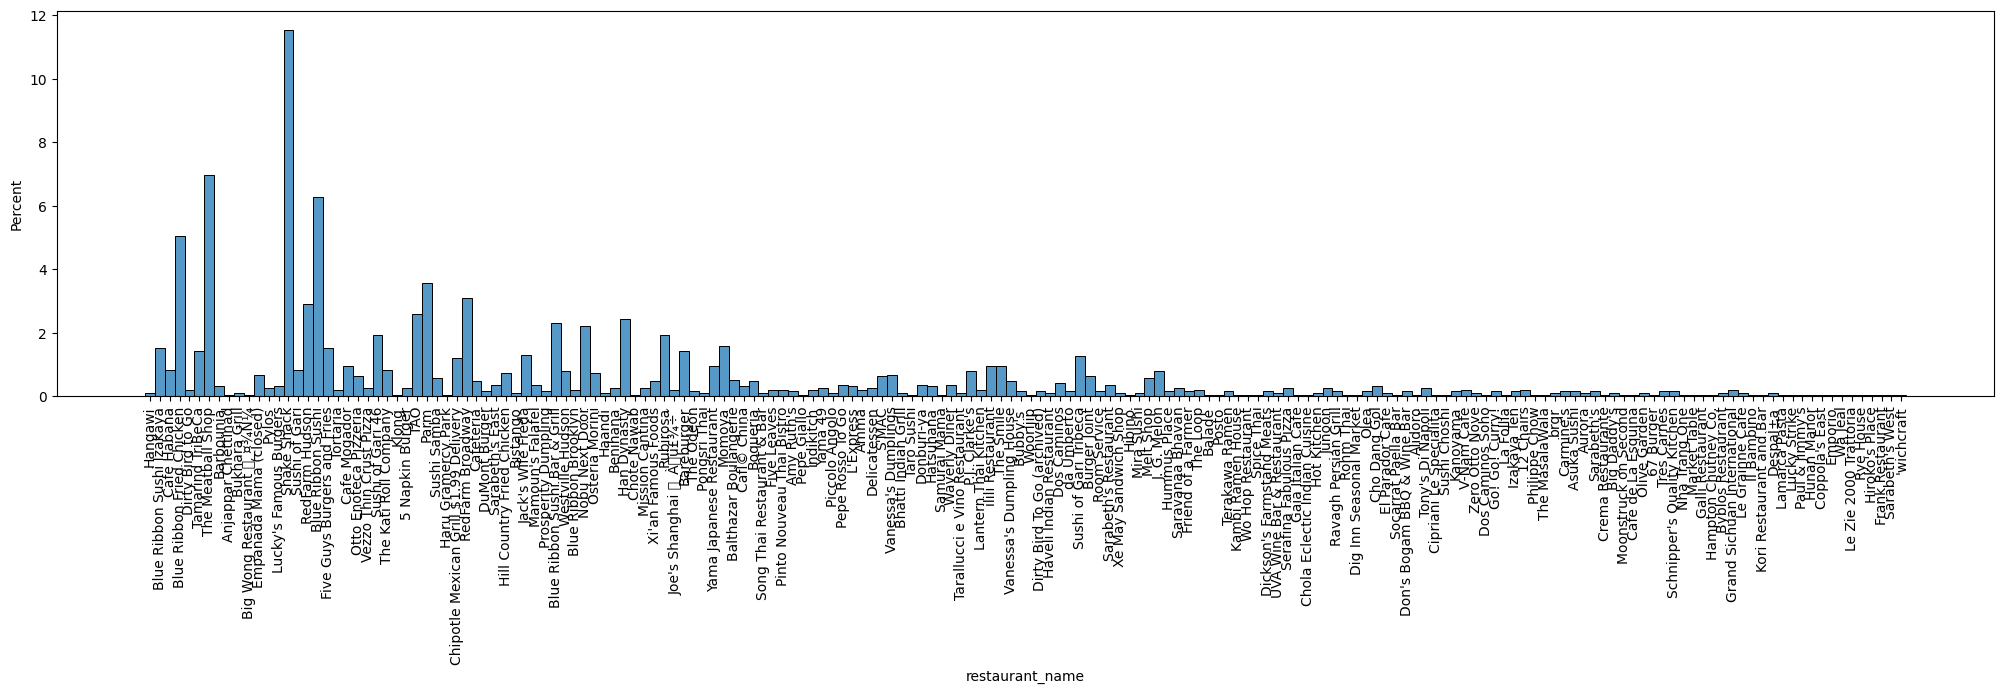

In [14]:
# Check for restaurant frequency
plt.figure(figsize = (25,5))
sns.histplot(data=foodhub,x='restaurant_name', stat='percent')
plt.xticks(rotation=90)
plt.show();

### Food Prep Time

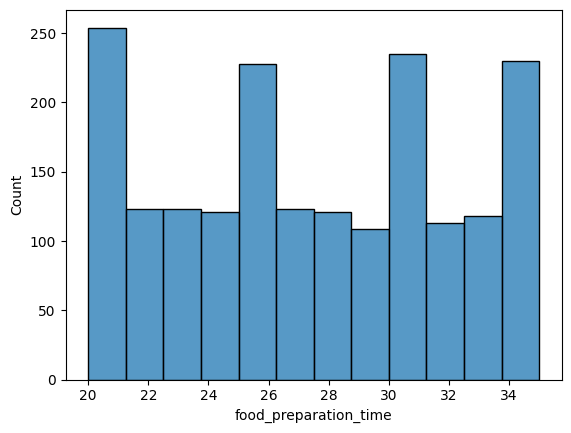

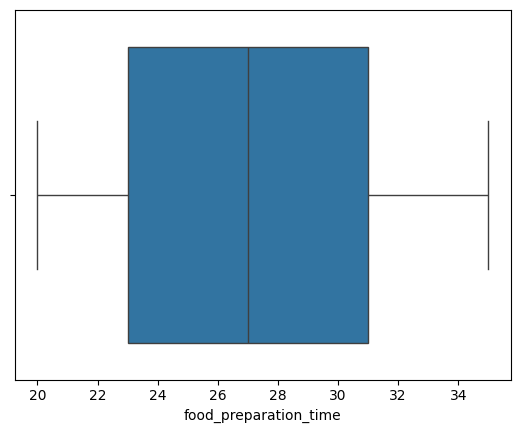

In [15]:
sns.histplot(data=foodhub,x='food_preparation_time')
plt.show()
sns.boxplot(data=foodhub,x='food_preparation_time')
plt.show()

### Delivery Time

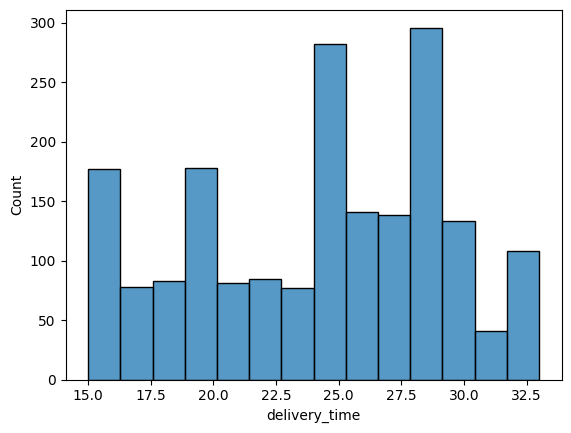

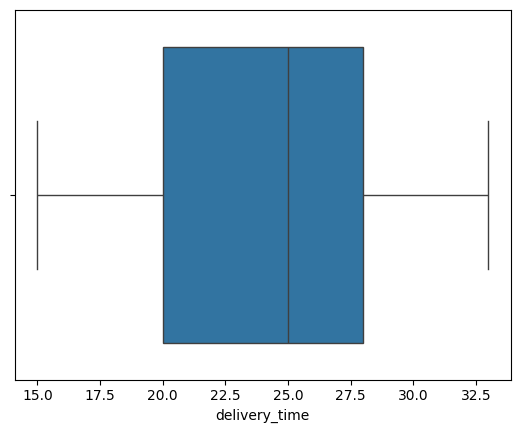

In [16]:
sns.histplot(data=foodhub,x='delivery_time')
plt.show()
sns.boxplot(data=foodhub,x='delivery_time')
plt.show()

### Order cost check

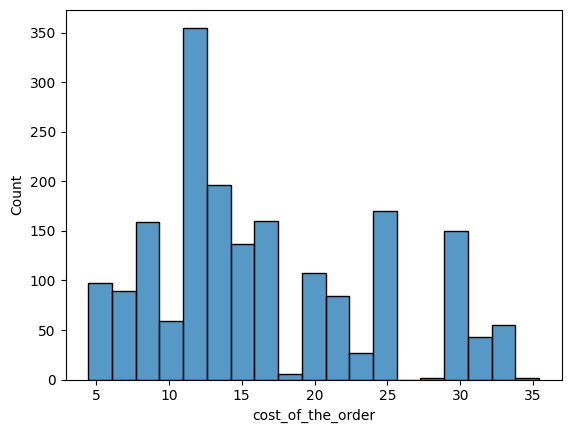

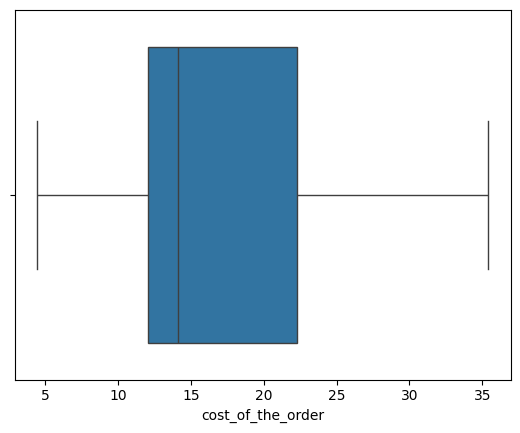

In [17]:
sns.histplot(data=foodhub,x='cost_of_the_order')
plt.show()
sns.boxplot(data=foodhub,x='cost_of_the_order')
plt.show()

### Days of Week

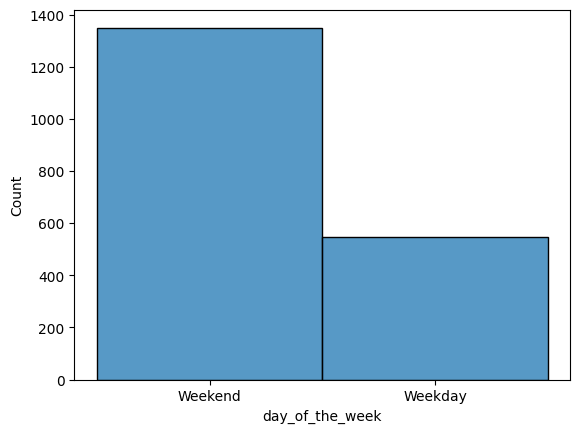

In [18]:
sns.histplot(data=foodhub,x='day_of_the_week')
plt.show()

###Rating

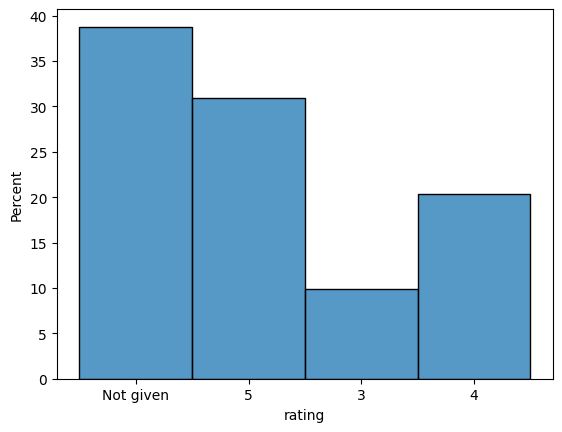

In [19]:
sns.histplot(data = foodhub, x = 'rating', stat='percent')
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
foodhub['restaurant_name'].groupby(foodhub['restaurant_name']).count().sort_values(ascending=False).head(5)

,restaurant_name
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Write the code here
weekend_orders = foodhub[foodhub['day_of_the_week'] == 'Weekend']
weekend_orders['cuisine_type'].groupby(weekend_orders['cuisine_type']).count().sort_values(ascending=False).head(5)

,cuisine_type
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Write the code here
expensive_orders = foodhub[foodhub['cost_of_the_order'] > 20]
percent_expensive_orders = expensive_orders.shape[0] / foodhub.shape[0] * 100
print(f'{percent_expensive_orders:.2f}% of the orders cost more than $20.')

29.24% of the orders cost more than $20.


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here
print(f'Mean delivery time : {foodhub['delivery_time'].mean():.2f} mins')

Mean delivery time : 24.16 mins


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here

#display(foodhub.groupby('customer_id')['customer_id'].count().sort_values(ascending=False).head(3))
display(foodhub['customer_id'].value_counts().head(3))

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


* American, Japanese, Italian and Chinese are the most popularcuisines ordered. These make up ~80% of all orders.
*   Shake Shack is about 12% of all orders, that is the most popular restaurant.
* Food preperation time is consistently betwen 20-34 mins, and median time is ~27 mins across all restaurants.
* Delivery times are bit skewed, approx 25% take 25-27.5 mins, where as the overall times vary betwen 15-32.5 mins. Average is 24 mins for all orders.
* In general, from order to delivery takes ~52 mins on an average.
* Cost of the orders is positively skewed, 50% of orders are below $15.
* 29.24% of orders are over $20
* Restaurants are busy over weekends for delivery orders, more than double orders are received over weekends compared to weekdays.
* About ~35+% of orders are unrated.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Check the columns

In [25]:
# Write the code here
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Day of Week vs Delivery Time

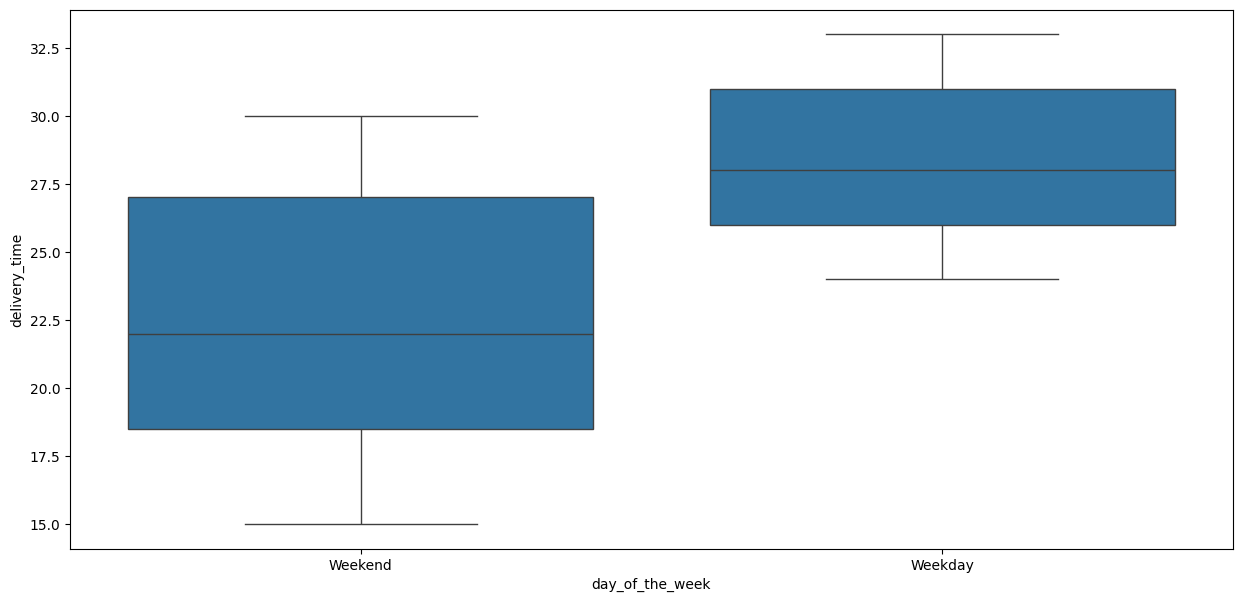

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = foodhub)
#plt.xticks(rotation = 90)
plt.show()

### Rating vs Cost of Order

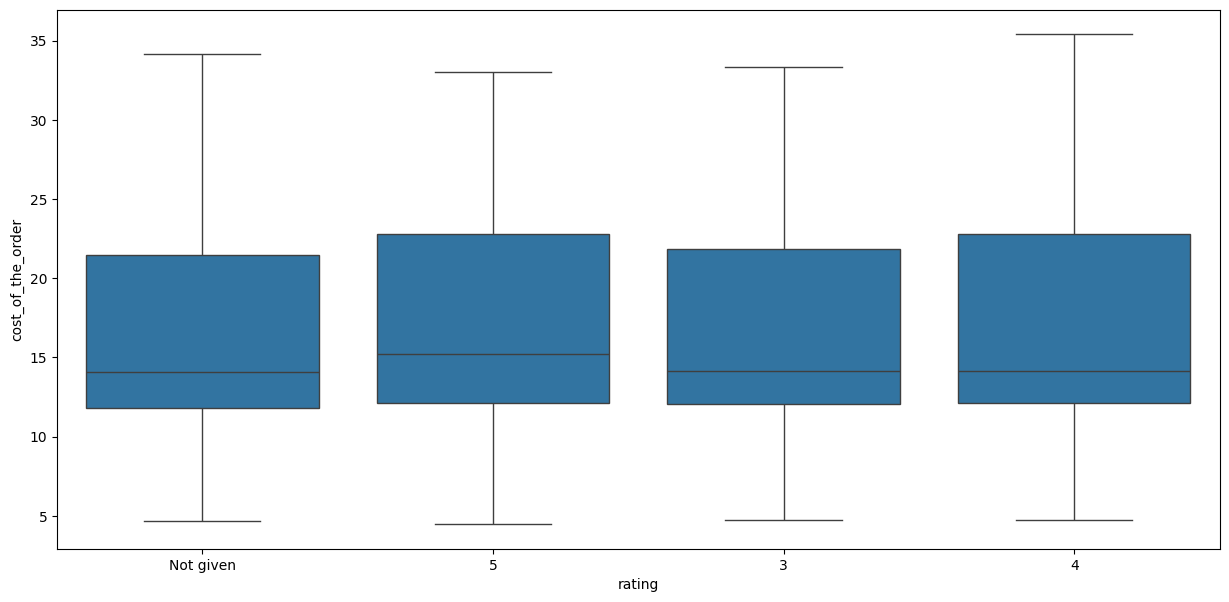

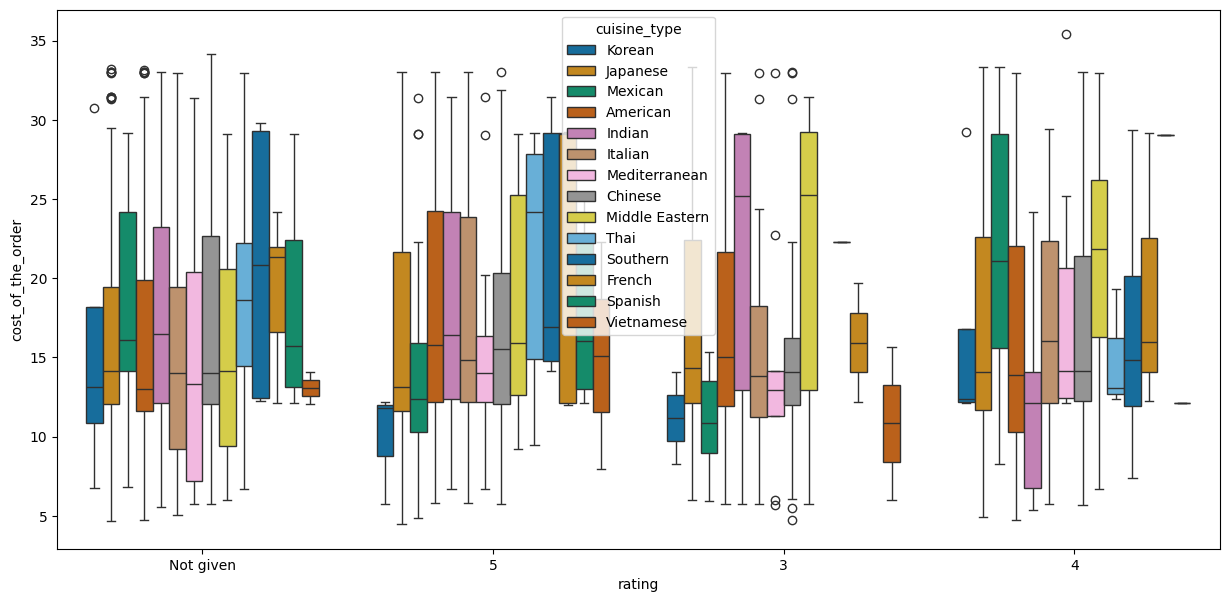

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = foodhub)
#plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "cost_of_the_order", data = foodhub, palette = 'colorblind', hue = "cuisine_type")
#plt.xticks(rotation = 90)
plt.show()


###Rating vs Delivery Time

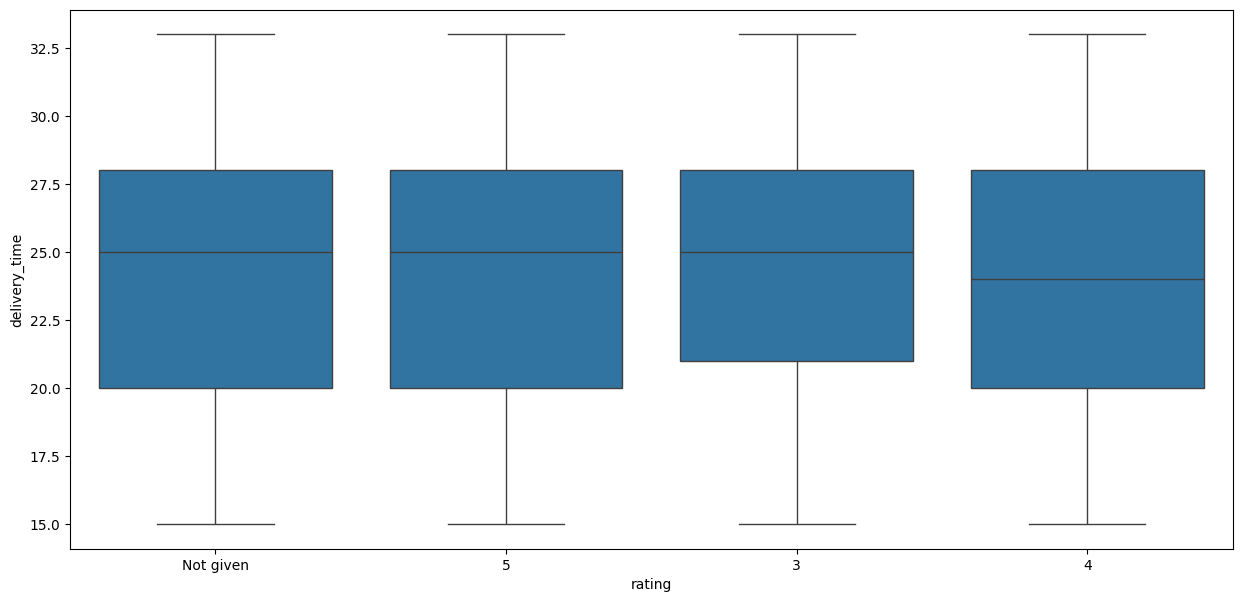

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "delivery_time", data = foodhub)
#plt.xticks(rotation = 90)
plt.show()

### Rating vs Food Prep Time

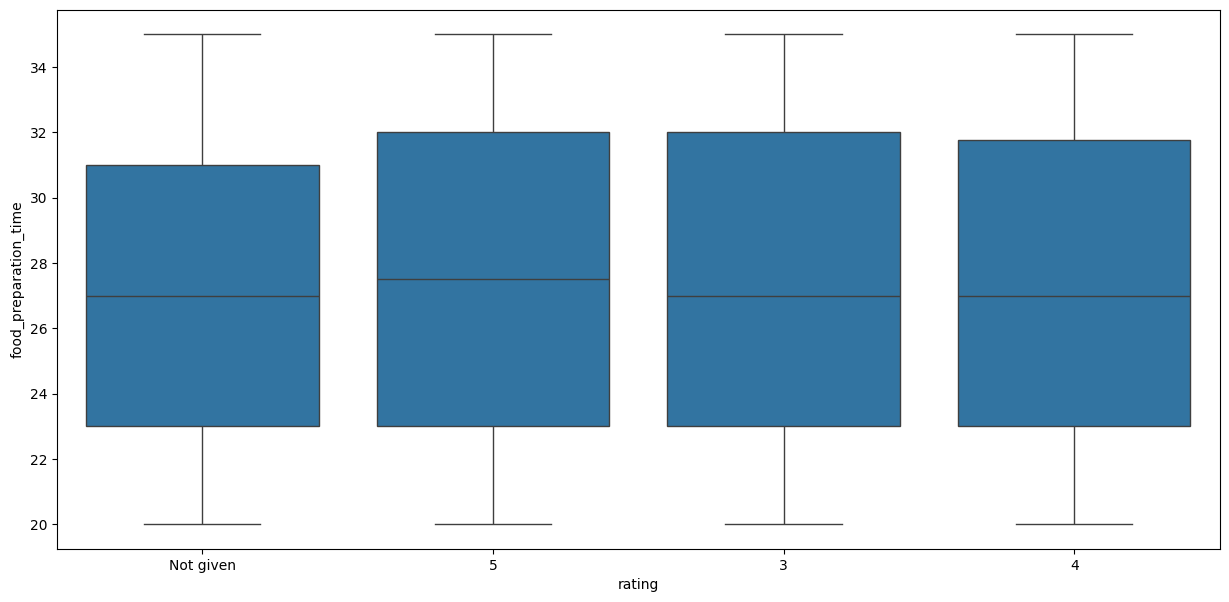

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "rating", y = "food_preparation_time", data = foodhub)
#plt.xticks(rotation = 90)
plt.show()

### Cuisine Vs Food Prep Time

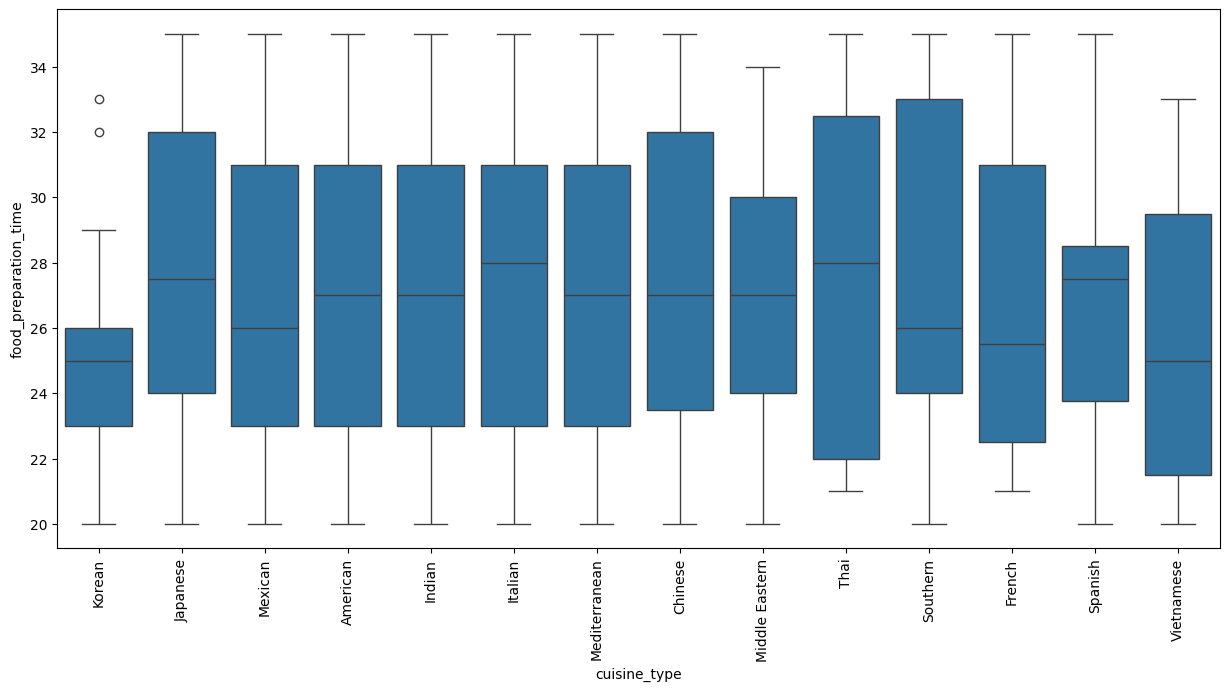

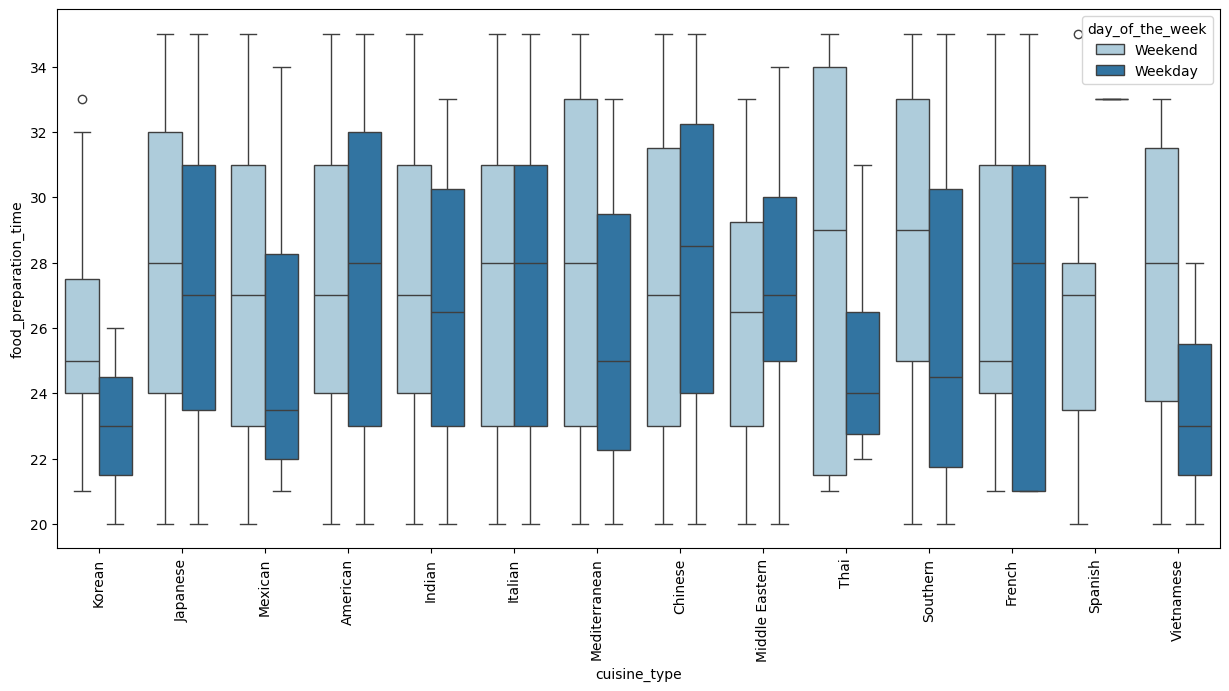

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = foodhub)
plt.xticks(rotation = 90)
plt.show();

plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = foodhub, palette="Paired", hue="day_of_the_week")
plt.xticks(rotation = 90)
plt.show();

### Cusine vs Cost

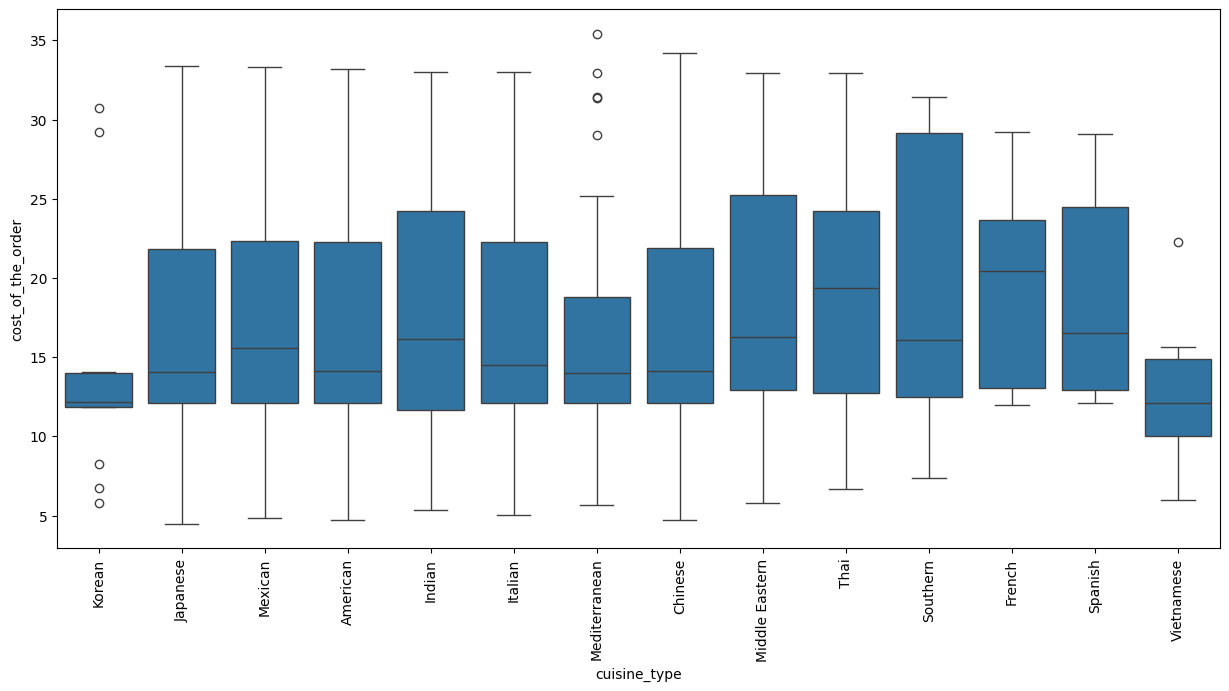

In [31]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = foodhub)
plt.xticks(rotation = 90)
plt.show()

### Cuisine vs Rating

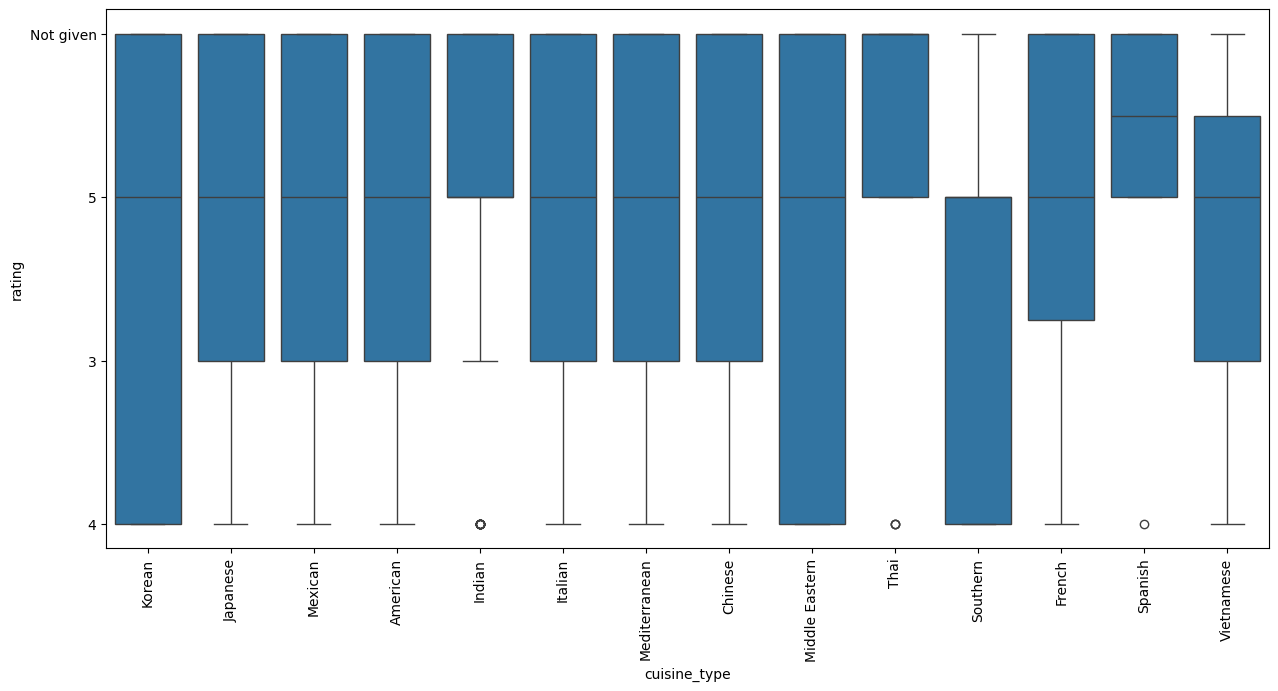

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "rating", data = foodhub)
plt.xticks(rotation = 90)
plt.show()

### Average Cost by Cuisine

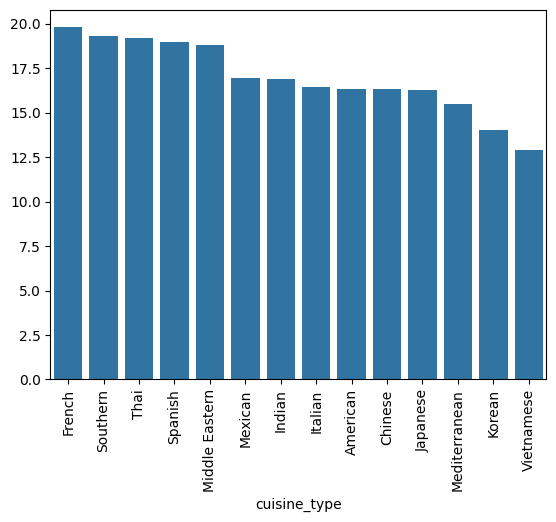

In [33]:
cost_by_cuisine = foodhub.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
sns.barplot(x=cost_by_cuisine.index, y=cost_by_cuisine.values)
plt.xticks(rotation=90)
plt.show()

### Top Restaurants

In [34]:
print('*'*50,'\n','Average Order Cost')
display(foodhub.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending = False).head(5));
print('*'*50,'\n','Revenue by Restaurant')
display(foodhub.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(5))
print('*'*50,'\n','Delivery time by Restaurant')
display(foodhub.groupby(['restaurant_name'])['delivery_time'].mean().sort_values(ascending = False).head(5))
display(foodhub.groupby(['restaurant_name'])['delivery_time'].mean().sort_values(ascending = False).tail(5))

************************************************** 
 Average Order Cost


,cost_of_the_order
restaurant_name,
Kambi Ramen House,32.930
Emporio,31.430
Bhatti Indian Grill,31.115
Haru Gramercy Park,29.830
Il Bambino,29.250


************************************************** 
 Revenue by Restaurant


,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76


************************************************** 
 Delivery time by Restaurant


,delivery_time
restaurant_name,
Sarabeth's West,33.0
Haru Gramercy Park,32.0
Taro Sushi,32.0
Frank Restaurant,31.0
Haandi,30.5


,delivery_time
restaurant_name,
Galli Restaurant,16.0
Paul & Jimmy's,15.0
Hibino,15.0
Gaia Italian Cafe,15.0
The MasalaWala,15.0


### Correlation

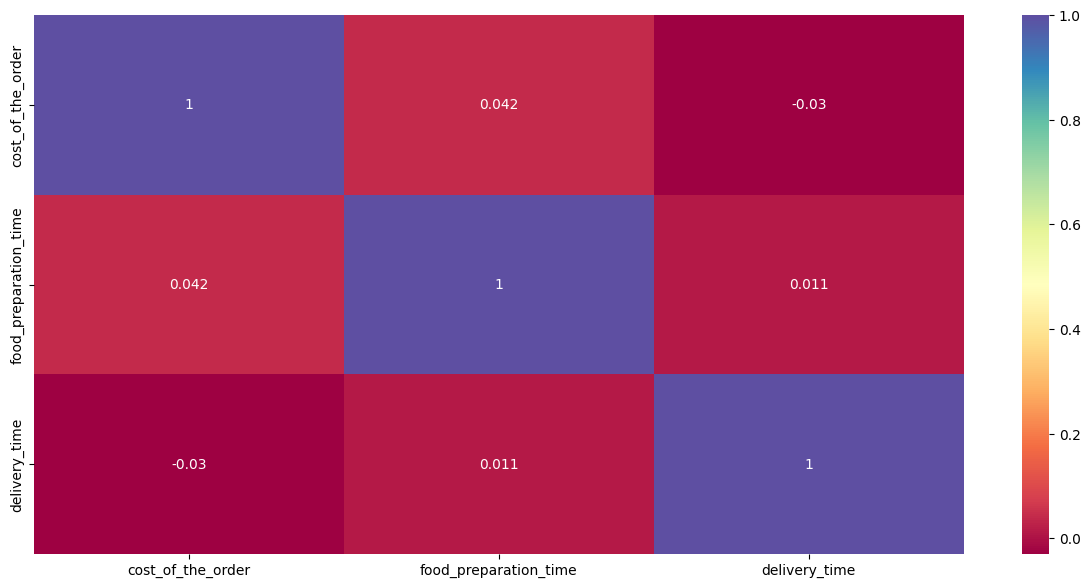

In [35]:
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(foodhub[numeric_cols].corr(), annot=True,  cmap="Spectral")
plt.show()

###Observations



*   Delivery times are high on weekdays compared to weekends, despite of more orders on weekends. 75% of weekend orders delivered faster than 50% of weekday orders
* 100% of all weekend orders are delivered faster than 75% of weekday orders.  
*   Orders about evenly rated among all rating types. The 'Not given' category takes about the equal share with 3-5.
* Cuisine type 'Mexican' seems to get lower ratings compared to other cuisines.
* Delivery time have a minor/negligible impact on rating of restaurant.
* Food prep time also have a minor/negligible impact on rating of restaurant.
* Food prep is seen to be slower for most cuisine types over weekdays compared to weekends.
* Food prep time for Thai cuisine varies a lot.
* Vietnamese and Korean have cheaper orders than others.
* Outliers in mediterrean and korean cuisine have outliers.
* Southern cuisine tends to have higher cost of order in general.
* French is the most expensive order followed by Southern, Thai, Spanish and middle eastern food.
* Kambi Ramen has the highest average order cost.
* Shake shack made most revenue, also has highest number of orders (most populer)
* The MasalaWala has lowest delivery time (15 mins) vs Sarabeth's West has highest (33 mins)
* Food prep time is higher for those with high cost order.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

###Info

In [36]:
foodhub.info()
print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
**************************************************


###Rated Orders

In [37]:
print("*"*50)
print('Rated Orders')
print("*"*50)
rated_orders = foodhub[foodhub['rating'] != 'Not given'].copy()
rated_orders = foodhub[foodhub['rating'] != 'Not given'].copy()
display(rated_orders.head())
rated_orders['rating'] = rated_orders['rating'].astype(int)
#rated_orders.info()

**************************************************
Rated Orders
**************************************************


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


### Rated restaurant

In [38]:
print("*"*50)
print('Rated Restaurants get Count')
print("*"*50)
rated_count = rated_orders.groupby('restaurant_name')['rating'].count().reset_index().copy()
rated_mean = rated_orders.groupby('restaurant_name')['rating'].mean().reset_index().copy()
#display(rated_count.describe().T)
display(rated_count.sort_values(by='rating',ascending=False).head())
print("*"*50)

**************************************************
Rated Restaurants get Count
**************************************************


,restaurant_name,rating
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64
104,RedFarm Broadway,41


**************************************************


###Rated more than 50 times

In [39]:
print("*"*50)
print('Rated Restaurants - rated more than 50 ratings')
print("*"*50)
rated_count.rename(columns={'rating':'rating_count'},inplace=True)
restaurants_50_plus = rated_count[rated_count['rating_count'] > 50].sort_values(by='rating_count',ascending=False)
display(restaurants_50_plus)
print("*"*50)
print('Restaurant Names - rated more than 50 ratings')
print("*"*50)
restaurants_name_50= restaurants_50_plus['restaurant_name']
display(restaurants_name_50)
#display(restaurants.sort_values(by='rating_count',ascending=False).head())
print("*"*50)
#rated_mean = rated_orders.groupby('restaurant_name')['rating'].mean().reset_index().copy()

**************************************************
Rated Restaurants - rated more than 50 ratings
**************************************************


,restaurant_name,rating_count
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64


**************************************************
Restaurant Names - rated more than 50 ratings
**************************************************


,restaurant_name
117,Shake Shack
132,The Meatball Shop
17,Blue Ribbon Sushi
16,Blue Ribbon Fried Chicken


**************************************************


###Average rating greater than 4

In [40]:
print("*"*50)
print('Rated Restaurants - More than 4 average rating')
print("*"*50)
rated_mean = rated_orders.groupby('restaurant_name')['rating'].mean().reset_index().copy()
rated_mean_4 = rated_mean[rated_mean['rating'] > 4].sort_values(by='rating',ascending=False)
rated_mean_4.rename(columns={'rating':'rating_mean'},inplace=True)
display(rated_mean_4)
print("*"*50)


**************************************************
Rated Restaurants - More than 4 average rating
**************************************************


,restaurant_name,rating_mean
0,'wichcraft,5.000000
3,67 Burger,5.000000
7,Asuka Sushi,5.000000
6,Anjappar Chettinad,5.000000
13,Bhatti Indian Grill,5.000000
...,...,...
26,Cafe Mogador,4.153846
154,ilili Restaurant,4.153846
94,Parm,4.128205
106,Rubirosa,4.125000


**************************************************


###Combine now - Average=4+ Rated and #Ratings=50+ Restaurants

In [41]:
print("*"*50)
print('Average=4+ Rated and #Ratings=50+ Restaurants')
print("*"*50)
rated_mean_4[rated_mean_4['restaurant_name'].isin(restaurants_name_50)]

**************************************************
Average=4+ Rated and #Ratings=50+ Restaurants
**************************************************


,restaurant_name,rating_mean
132,The Meatball Shop,4.511905
16,Blue Ribbon Fried Chicken,4.328125
117,Shake Shack,4.278195
17,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

###Charge Calculation function



In [42]:
def chargcalc(cost_of_the_order):
  if cost_of_the_order > 20:
    return round(cost_of_the_order * 0.25,2)
  elif cost_of_the_order > 5:
    return round(cost_of_the_order * 0.15,2)
  else:
    return 0


###Create Charge column to dataframe

In [43]:
print("*"*50)
print('Create Charge Column')
print("*"*50)
foodhub['charge'] = foodhub['cost_of_the_order'].apply(chargcalc)
display(foodhub.head(10))


**************************************************
Create Charge Column
**************************************************


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.91
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.90
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.08


###Lets find revenue

In [44]:
print("*"*50)
print('Total Revenue')
print("*"*50)
print(foodhub['charge'].sum())

**************************************************
Total Revenue
**************************************************
6166.5


In [45]:
foodhub

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.58
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.83
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.30
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.83


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

**************************************************
Total orders :  1898
Orders too more than 60 mins :  200
% of orders took more than 60 mins :  10.537407797681771
**************************************************


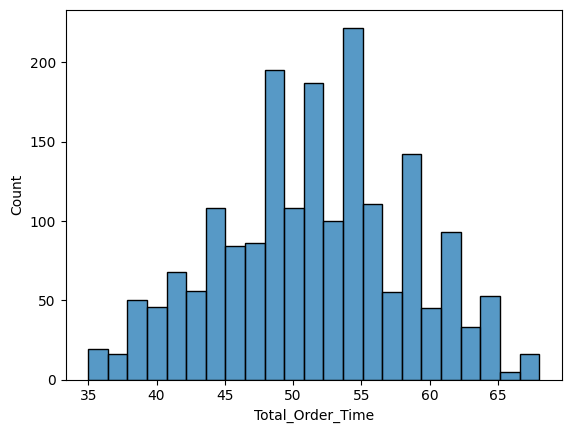

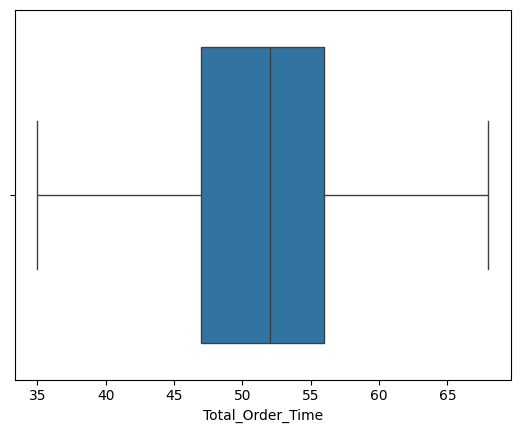

In [46]:
###Total Order Time
foodhub['Total_Order_Time'] = foodhub['food_preparation_time'] + foodhub['delivery_time']
print("*"*50)
print('Total orders : ' , foodhub.shape[0])
print('Orders too more than 60 mins : ' , foodhub[foodhub['Total_Order_Time'] > 60].shape[0])
print('% of orders took more than 60 mins : ' , foodhub[foodhub['Total_Order_Time'] > 60].shape[0] / foodhub.shape[0] * 100)
print("*"*50)
sns.histplot(data=foodhub,x='Total_Order_Time')
plt.show()
sns.boxplot(data=foodhub,x='Total_Order_Time')
plt.show()

#foodhub

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [47]:
# Write the code here
print('The mean delivery time on Weekday ~', round(foodhub[foodhub['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')
print('The mean delivery time on Weekend ~', round(foodhub[foodhub['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')


The mean delivery time on Weekday ~ 28 minutes
The mean delivery time on Weekend ~ 22 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* American, Japanese, Italian and Chinese are the most popular cuisines ordered.
*   Shake Shack is about 12% of all orders, that is the most popular restaurant.
* Food preperation time on an average is ~27 mins across all restaurants.
* Delivery times are average is 24 mins for all orders.
* In general, from order to delivery takes ~52 mins on an average.
* Approx 50% of orders are below 15 and 29.24% of orders are over $20
* Restaurants are busy over weekends for delivery orders.
* About ~35+% of orders are unrated.
* Delivery times are better on weekends than weekdays despite of more orders on weekends. 75% of weekend orders delivered faster than 50% of weekday orders.
* Cuisine type 'Mexican' seems to get lower ratings compared to other cuisines.
* Both delivery time and food prep time have a minor/negligible impact on rating of restaurant, also prep is slower for most cuisine types over weekdays compared to weekends.
* Food prep time for Thai cuisine varies a lot, also comaparitively way slower on weekends than weekdays.
* Vietnamese and Korean have cheaper orders than others.
* Outliers in mediterrean and korean cuisine needs to be looked at for the reason of variance in order cost.
* Southern cuisine tends to have higher cost of order in general.
* French is the most expensive order followed by Southern, Thai, Spanish and middle eastern food.
* Kambi Ramen has the highest average order cost.
* Shake shack made most revenue, also has highest number of orders (most populer)
* The MasalaWala has lowest delivery time (15 mins) vs Sarabeth's West has highest (33 mins)
* Food prep time is higher for those with high cost order, that may be because of larger orders need more time to prep, which can be logical but need more details.


### Recommendations:

* Considering the delivery and prep time had marginal impact on ratings, the quality of food and price seem to matter the most, so invest more into American, Japanes, Italian and Chinese Cuisine
* Inestigate what is great about MasalaWalla's delivery, their faster delivery may be helpful for others. On other hand, delivery from Sarabeth's is slowest.
* Kambu Ramen has biggest average order cost, need more investigation to understand. Bigger the order, better is revenue.
* A large number of orders are unrated, provide incentive to rating, which will provide better insights.
* Improving delivery times may provide better and more revenue.

In [8]:
!jupyter nbconvert --to html P1_FoodHub_VK_Notebook_Full_Code.ipynb

[NbConvertApp] Converting notebook P1_FoodHub_VK_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 23 image(s).
[NbConvertApp] Writing 1479788 bytes to P1_FoodHub_VK_Notebook_Full_Code.html


---